In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import lmfit

In [118]:
sns.set()
%matplotlib inline

In [119]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
%autoreload 2

In [121]:
from sir_models.sir import SIROneStain

# Load data

In [218]:
df = pd.read_csv('data/data.csv', sep=';')

In [219]:
df.columns = ['date', 'region', 'total_infected', 'total_recovered', 'total_dead', 'deaths_per_day', 'infected_per_day', 'recovered_per_day']
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

df['infected'] = df['total_infected'] - df['total_recovered'] - df['total_dead']

In [220]:
#df = df[df.region == 'Москва'].reset_index()
df = df.groupby('date').sum().reset_index()

In [221]:
df.head()

,date,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected
0,2020-03-12,34,0,0,0,34,0,34
1,2020-03-13,45,0,0,0,11,0,45
2,2020-03-14,59,0,0,0,14,0,59
3,2020-03-15,63,3,0,0,4,3,60
4,2020-03-16,91,5,0,0,28,2,86


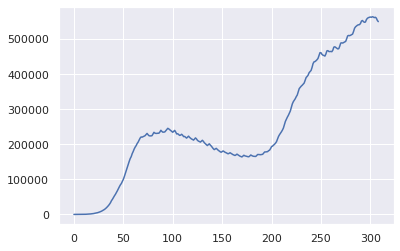

In [222]:
df['infected'].plot()

In [224]:
df_smoothed = df.rolling(3).mean()
df_smoothed['date'] = df['date']
df_smoothed.head(10)

,total_infected,total_recovered,total_dead,deaths_per_day,infected_per_day,recovered_per_day,infected,date
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-13
2,46.000000,0.000000,0.0,0.0,19.666667,0.000000,46.000000,2020-03-14
3,55.666667,1.000000,0.0,0.0,9.666667,1.000000,54.666667,2020-03-15
4,71.000000,2.666667,0.0,0.0,15.333333,1.666667,68.333333,2020-03-16
5,89.333333,4.333333,0.0,0.0,18.333333,1.666667,85.000000,2020-03-17
6,117.333333,5.000000,0.0,0.0,28.000000,0.666667,112.333333,2020-03-18
7,153.333333,5.000000,0.0,0.0,36.000000,0.000000,148.333333,2020-03-19
8,199.666667,7.333333,0.0,0.0,46.333333,2.333333,192.333333,2020-03-20
9,252.666667,11.000000,0.0,0.0,53.000000,3.666667,241.666667,2020-03-21


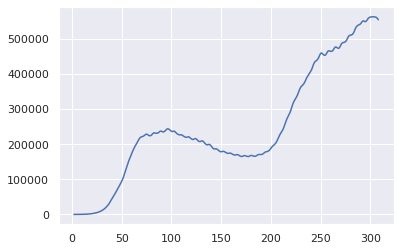

In [225]:
df_smoothed.infected.plot()

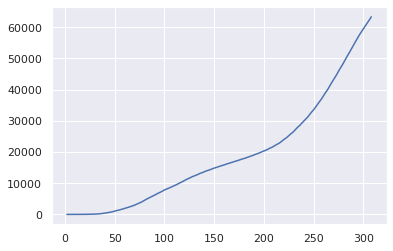

In [235]:
df_smoothed.total_dead.plot()

In [236]:
df = df_smoothed.dropna().reset_index(drop=True)

# Set global params

In [296]:
#population = 12_000_000
population = 140_000_000

In [297]:
start_day = df.iloc[0].date
end_day = df.iloc[-1].date
days_in_cycle = 1
dates = pd.date_range(start=start_day,
                      end=end_day,
                      freq=f"{days_in_cycle}D")

t = np.arange(len(dates))
len(t)

307

# SIR first peak

In [310]:
model = SIROneStain(population)

subset = df[20:110]
model.fit(subset, subset['total_dead'].values)

result = model.fit_result_
#result.plot_fit(datafmt="-");
result

In [311]:
R0 = result.params['beta']/result.params['gamma']
R0

2.5012839007816314

In [312]:
S, I, R, D = model.predict(subset)

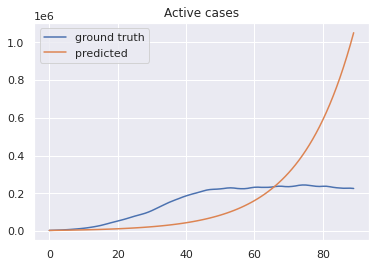

In [313]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['infected'], label='ground truth')
plt.plot(x, I, label='predicted')
plt.legend()
plt.title('Active cases')
plt.show()

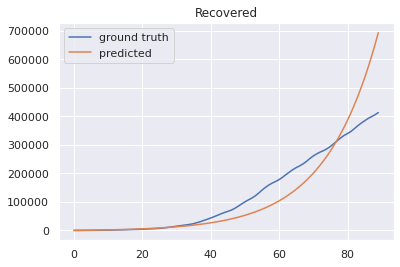

In [314]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_recovered'], label='ground truth')
plt.plot(x, R, label='predicted')
plt.legend()
plt.title('Recovered')
plt.show()

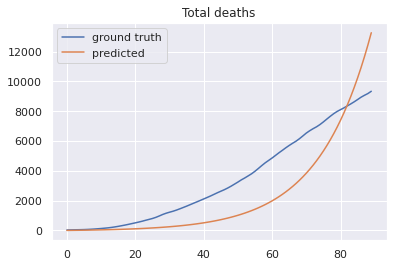

In [315]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_dead'], label='ground truth')
plt.plot(x, D, label='predicted')
plt.legend()
plt.title('Total deaths')
plt.show()

# SIR recent

In [328]:
model = SIROneStain(population)

subset = df[150:]
model.fit(subset, subset['total_dead'].values)

S, I, R, D = model.predict(subset)
result = model.fit_result_
result

In [329]:
R0 = result.params['beta']/result.params['gamma']
R0

1.3103909572233419

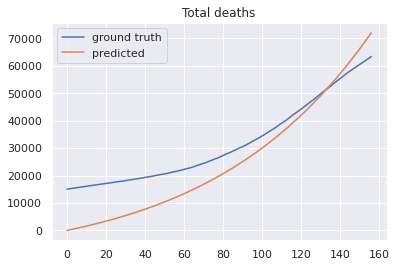

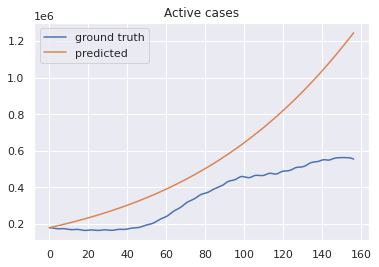

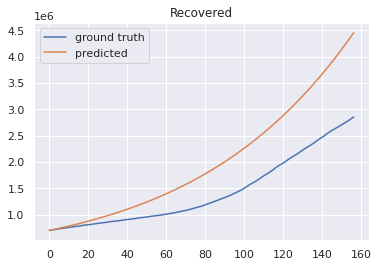

In [330]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_dead'], label='ground truth')
plt.plot(x, D, label='predicted')
plt.legend()
plt.title('Total deaths')
plt.show()

plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['infected'], label='ground truth')
plt.plot(x, I, label='predicted')
plt.legend()
plt.title('Active cases')
plt.show()

plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_recovered'], label='ground truth')
plt.plot(x, R, label='predicted')
plt.legend()
plt.title('Recovered')
plt.show()

# SIR full

In [321]:
model = SIROneStain(population)
subset = df
model.fit(subset, subset['total_dead'].values)

result = model.fit_result_
R0 = result.params['beta']/result.params['gamma']
R0

1.8687706093571888

In [322]:
result

In [323]:
S, I, R, D = model.predict(subset)

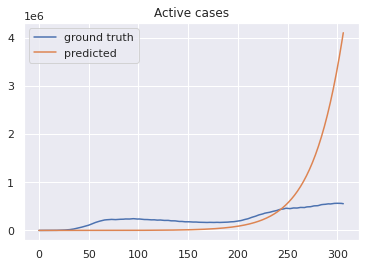

In [324]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['infected'], label='ground truth')
plt.plot(x, I, label='predicted')
plt.legend()
plt.title('Active cases')
plt.show()

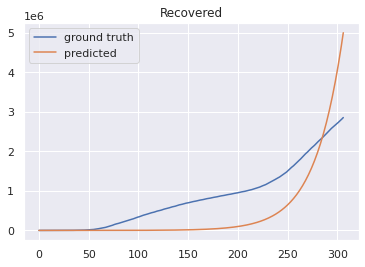

In [307]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_recovered'], label='ground truth')
plt.plot(x, R, label='predicted')
plt.legend()
plt.title('Recovered')
plt.show()

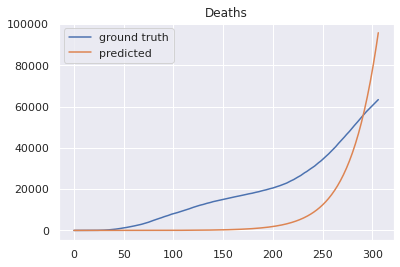

In [308]:
plt.figure()
x = np.arange(len(subset))
plt.plot(x, subset['total_dead'], label='ground truth')
plt.plot(x, D, label='predicted')
plt.legend()
plt.title('Deaths')
plt.show()

# Evaluate predictive ability

In [112]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error

In [113]:
tscv = TimeSeriesSplit(n_splits=5,
                       max_train_size=50)

Fold 0
50 51


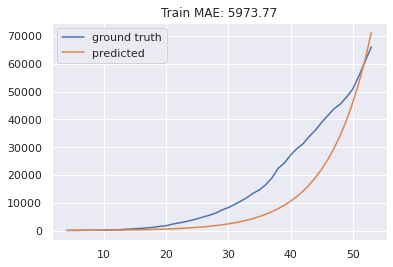

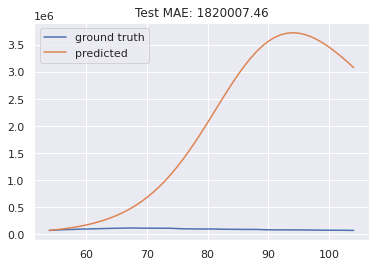

Fold 1
50 51


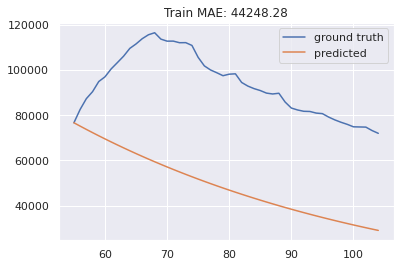

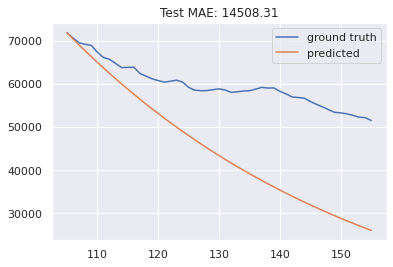

Fold 2
50 51


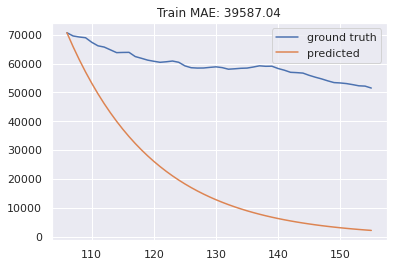

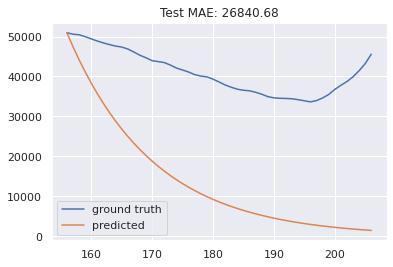

Fold 3
50 51


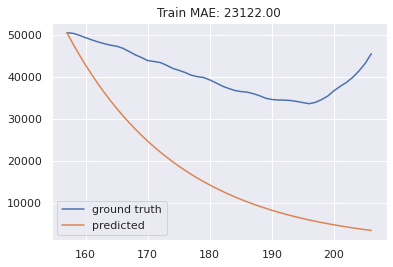

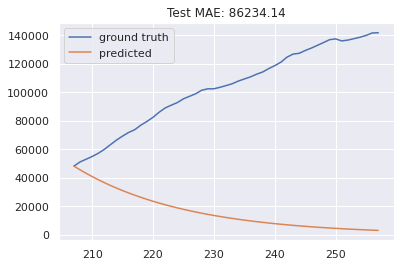

Fold 4
50 51


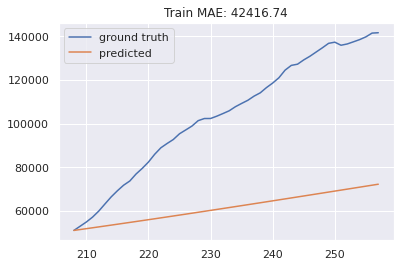

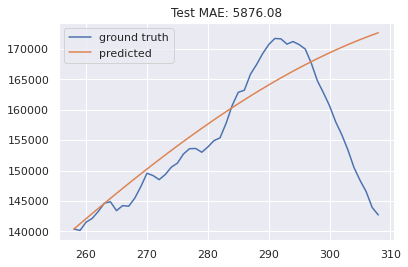

In [114]:
maes = []
params = []
for i, (train_index, test_index) in enumerate(tscv.split(range(len(df)))):
    print('Fold', i)
    print(len(train_index), len(test_index))
    train_subset = df.iloc[train_index]
    test_subset = df.iloc[test_index]
    
    model = SIROneStain(population)
    model.fit(train_subset, train_subset[['infected', 'total_recovered']].values)

    result = model.fit_result_
    params.append(result.params)
    #result.plot_fit(datafmt="-")
    
    train_S, train_I, train_R, train_D = model.predict(train_subset)
    
    S, I, R, D = model.predict(test_subset)
    
    train_mae = mean_absolute_error(train_I, train_subset['infected'])
    
    plt.figure()
    plt.plot(train_index, train_subset['infected'], label='ground truth')
    plt.plot(train_index, train_I, label='predicted')
    plt.title(f'Train MAE: {train_mae:0.2f}')
    plt.legend()
    plt.show()
    
    mae = mean_absolute_error(I, test_subset['infected'])
    maes.append(mae)
    
    plt.figure()
    plt.plot(test_index, test_subset['infected'], label='ground truth')
    plt.plot(test_index, I, label='predicted')
    plt.title(f'Test MAE: {mae:0.2f}')
    plt.legend()
    plt.show()

In [115]:
params

[Parameters([('population',
              <Parameter 'population', value=12000000 (fixed), bounds=[-inf:inf]>),
             ('beta',
              <Parameter 'beta', value=0.21887980728190842 +/- 0.00111, bounds=[0:3]>),
             ('gamma',
              <Parameter 'gamma', value=0.07142857142857142 (fixed), bounds=[0:1]>),
             ('alpha', <Parameter 'alpha', value=0.018 (fixed), bounds=[0:1]>),
             ('rho',
              <Parameter 'rho', value=0.045454545454545456 (fixed), bounds=[0:1]>)]),
 Parameters([('population',
              <Parameter 'population', value=12000000 (fixed), bounds=[-inf:inf]>),
             ('beta',
              <Parameter 'beta', value=0.05210529015370735 +/- 0.00276, bounds=[0:3]>),
             ('gamma',
              <Parameter 'gamma', value=0.07142857142857142 (fixed), bounds=[0:1]>),
             ('alpha', <Parameter 'alpha', value=0.018 (fixed), bounds=[0:1]>),
             ('rho',
              <Parameter 'rho', value=0.045454545454

In [116]:
np.mean(maes)

390693.3320324879